# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
# CITATION: Instructor help
table = soup.find("table", class_="table")
rows = table.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_temperature_data = []
# Loop through the scraped data to create a list of rows
# CITATION: Instructor help
for row in rows:
    cells = row.find_all("td")
    row_for_df = []
    for c in cells:
        row_for_df.append(c.text)
    mars_temperature_data.append(row_for_df)

mars_temperature_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(mars_temperature_data)
df.rename(columns={
    0: 'id',
    1: 'terrestrial_date',
    2: 'sol',
    3: 'ls',
    4: 'month',
    5: 'min_temp',
    6: 'pressure'
}, inplace=True)


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
column_data_types = df.dtypes
column_data_types

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'], errors='coerce').astype('Int64')
df['ls'] = pd.to_numeric(df['ls'], errors='coerce').astype('Int64')
df['month'] = pd.to_numeric(df['month'], errors='coerce').astype('Int64')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')






In [11]:
# Confirm type changes were successful by examining data types again
# Confirm the data type changes by examining data types again
column_data_types_updated = df.dtypes
column_data_types_updated


id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                           Int64
month                        Int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Calculate the number of unique months on Mars
# Group the DataFrame by the 'month' column and count the number of days in each unique month
month_counts = df.groupby('month').size()

# Print the count of days in each unique month
for month, count in month_counts.items():
    print(f"Month {month}: {count} days")



Month 1: 174 days
Month 2: 178 days
Month 3: 192 days
Month 4: 194 days
Month 5: 149 days
Month 6: 147 days
Month 7: 142 days
Month 8: 141 days
Month 9: 134 days
Month 10: 112 days
Month 11: 138 days
Month 12: 166 days


In [13]:
# 2. How many Martian days' worth of data are there?
# Count how many Martian days' worth of data are there
martian_days_count = df['sol'].nunique()
print(f"There are data for {martian_days_count} Martian days.")


There are data for 1867 Martian days.


In [14]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature by month
average_low_by_month = df.groupby('month')['min_temp'].mean()

# Print the average low temperature for each month
for month, avg_temp in average_low_by_month.items():
    print(f"Month {month}: Average Low Temperature = {avg_temp:.2f} °C")


Month 1: Average Low Temperature = -77.16 °C
Month 2: Average Low Temperature = -79.93 °C
Month 3: Average Low Temperature = -83.31 °C
Month 4: Average Low Temperature = -82.75 °C
Month 5: Average Low Temperature = -79.31 °C
Month 6: Average Low Temperature = -75.30 °C
Month 7: Average Low Temperature = -72.28 °C
Month 8: Average Low Temperature = -68.38 °C
Month 9: Average Low Temperature = -69.17 °C
Month 10: Average Low Temperature = -71.98 °C
Month 11: Average Low Temperature = -71.99 °C
Month 12: Average Low Temperature = -74.45 °C


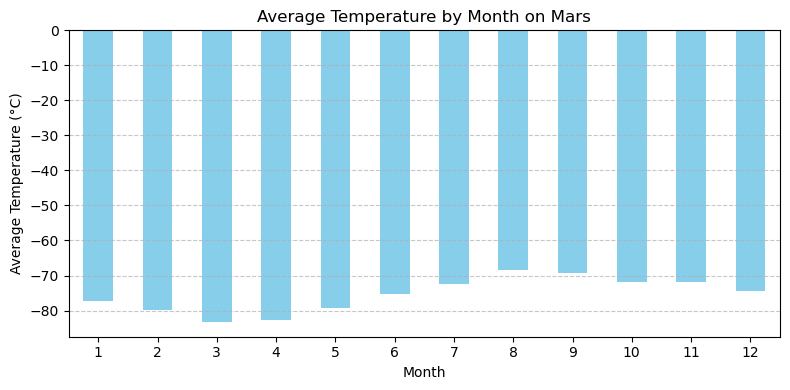

In [15]:
# Plot the average temperature by month
# Calculate the average temperature by month
average_temp_by_month = df.groupby('month')['min_temp'].mean()

# Create a bar plot for average temperature by month
plt.figure(figsize=(8, 4))
average_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


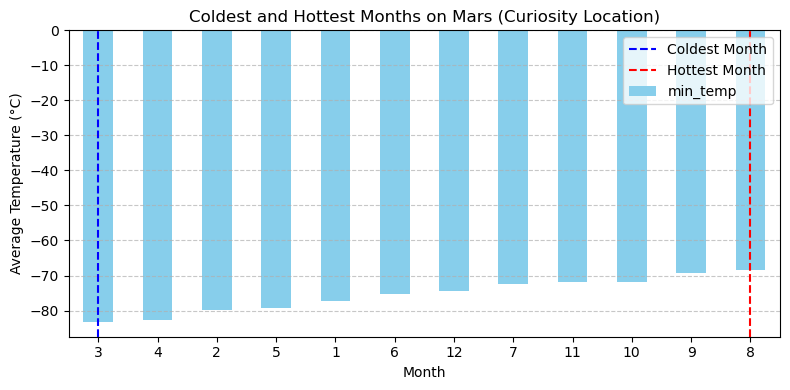

The coldest month is Month 3: Average Low Temperature = -83.31 °C
The hottest month is Month 8: Average Low Temperature = -68.38 °C


In [17]:
# Identify the coldest and hottest months in Curiosity's location

# Sort months by average temperature in descending order (coldest to hottest)
sorted_months = average_temp_by_month.sort_values(ascending=True)

# Find the coldest and hottest months
coldest_month = sorted_months.idxmin()
hottest_month = sorted_months.idxmax()

# Create a bar plot for average temperature by month
plt.figure(figsize=(8, 4))
sorted_months.plot(kind='bar', color='skyblue')
plt.title('Coldest and Hottest Months on Mars (Curiosity Location)')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the coldest and hottest months
plt.axvline(x=list(sorted_months.index).index(coldest_month), color='blue', linestyle='--', label='Coldest Month')
plt.axvline(x=list(sorted_months.index).index(hottest_month), color='red', linestyle='--', label='Hottest Month')
plt.legend()

plt.tight_layout()

# Show the plot
plt.show()

# Print the coldest and hottest months
print(f"The coldest month is Month {coldest_month}: Average Low Temperature = {average_temp_by_month[coldest_month]:.2f} °C")
print(f"The hottest month is Month {hottest_month}: Average Low Temperature = {average_temp_by_month[hottest_month]:.2f} °C")



In [18]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
average_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

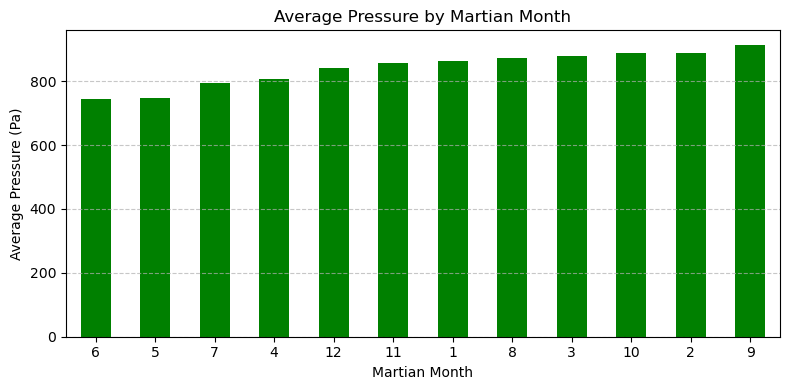

In [19]:
# Plot the average pressure by month
# Sort months by average pressure in ascending order (lower pressure to higher pressure)
sorted_months = average_pressure_by_month.sort_values(ascending=True)

# Create a bar plot for average pressure by month
plt.figure(figsize=(8, 4))
sorted_months.plot(kind='bar', color='green')
plt.title('Average Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

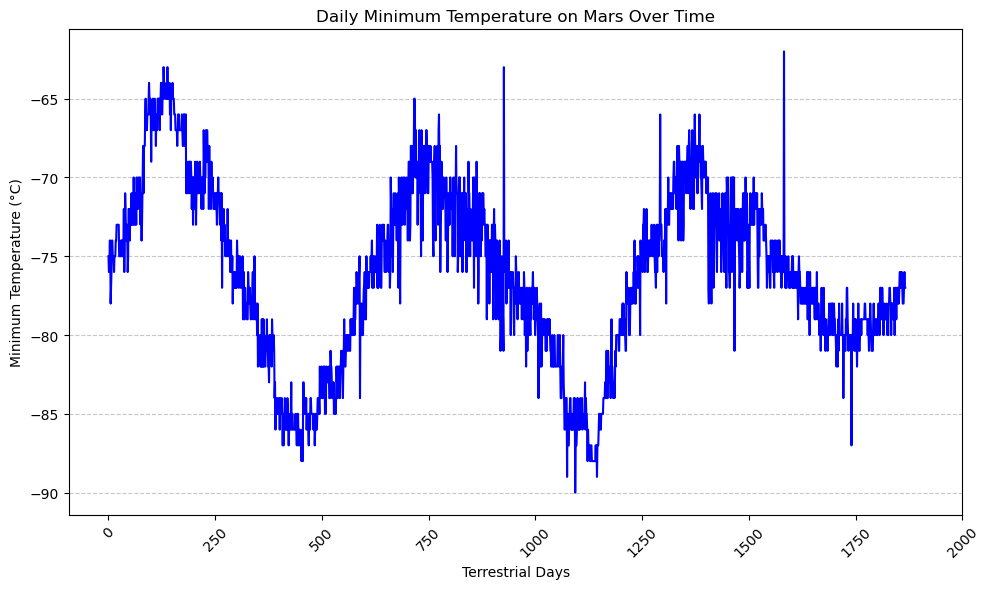

Estimated number of terrestrial days in a Martian year: 2021 days


In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import numpy as np
# Calculate the number of Earth days in a Martian year
terrestrial_days_in_martian_year = df['terrestrial_date'].max() - df['terrestrial_date'].min()
terrestrial_days_in_martian_year = terrestrial_days_in_martian_year.days  # Convert to days

# Create an array of terrestrial days every 250 days
terrestrial_days_interval = np.arange(0, terrestrial_days_in_martian_year, 250)

# Create a line plot of the daily minimum temperature with x-axis as terrestrial days
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['min_temp'], color='blue', label='Min Temp (°C)')
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(terrestrial_days_interval, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print the estimated number of terrestrial days in a Martian year
print(f"Estimated number of terrestrial days in a Martian year: {terrestrial_days_in_martian_year} days")


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)
print("DataFrame has been exported to mars_data.csv")

DataFrame has been exported to mars_data.csv


In [22]:
browser.quit()